# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

sns.set(color_codes = True)


from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering

# Import Data

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Cleaning and Visualization

In [3]:
df = df.drop('CUST_ID',axis = 1)

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Check NAN Values
for i in df.columns:
    print (i+": "+str(df[i].isna().sum()))

BALANCE: 0
BALANCE_FREQUENCY: 0
PURCHASES: 0
ONEOFF_PURCHASES: 0
INSTALLMENTS_PURCHASES: 0
CASH_ADVANCE: 0
PURCHASES_FREQUENCY: 0
ONEOFF_PURCHASES_FREQUENCY: 0
PURCHASES_INSTALLMENTS_FREQUENCY: 0
CASH_ADVANCE_FREQUENCY: 0
CASH_ADVANCE_TRX: 0
PURCHASES_TRX: 0
CREDIT_LIMIT: 1
PAYMENTS: 0
MINIMUM_PAYMENTS: 313
PRC_FULL_PAYMENT: 0
TENURE: 0


In [7]:
# NAN values are less as compared to data, we can drop NAN samples but will replace with median.
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

<AxesSubplot:>

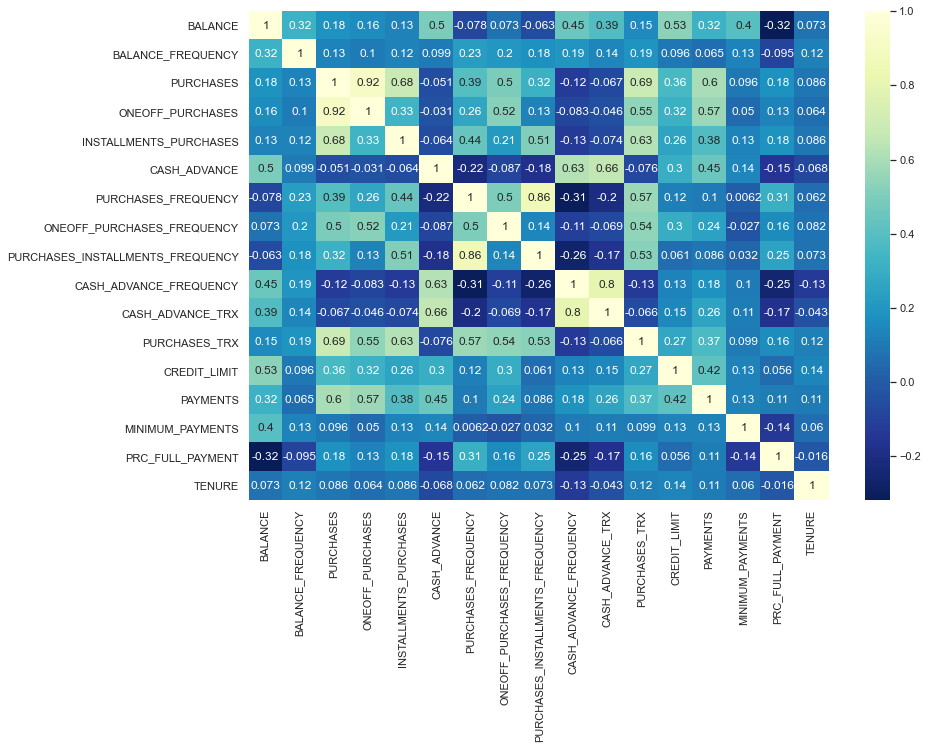

In [8]:
corr = df.corr()

plt.figure(figsize = (13,9))
sns.heatmap(corr,annot = True,cmap = 'YlGnBu_r')

# Data Preprocessing

In [9]:
ss = StandardScaler()

ss.fit_transform(df)

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

# Cluster Model

In [10]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df)

KMeans(max_iter=50, n_clusters=4)

In [11]:
kmeans.labels_

array([2, 1, 1, ..., 2, 2, 2])

In [12]:
def doKmeans(X, nclust=4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

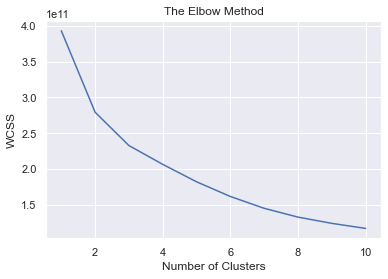

In [14]:
# Elbow Method:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:

clust_labels, cent = doKmeans(df, 4)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)

In [16]:
df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [17]:
df.kmeans.value_counts()

3    6441
0    2320
2     133
1      56
Name: kmeans, dtype: int64

In [18]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [19]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8,9]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5117730845368936
For n_clusters=3, the silhouette score is 0.465306617431797
For n_clusters=4, the silhouette score is 0.39866136138019065
For n_clusters=5, the silhouette score is 0.4363876671819995
For n_clusters=6, the silhouette score is 0.37303348735042885
For n_clusters=7, the silhouette score is 0.3701953622867625
For n_clusters=8, the silhouette score is 0.3816819248335974
For n_clusters=9, the silhouette score is 0.3552497553072034


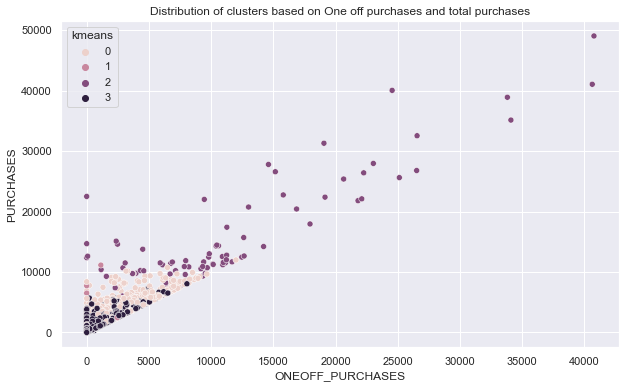

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='kmeans')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

In [21]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df)

KMeans(max_iter=50, n_clusters=3)

In [22]:
df['label'] = kmeans.labels_


In [23]:
df.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans,label
8835,1868.576501,1.000000,1337.34,1294.84,42.50,3132.667468,0.833333,0.833333,0.166667,1.000000,10,23,3000.0,3236.129237,384.230828,0.000000,6,3,0
6617,31.552295,1.000000,190.26,0.00,190.26,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,113.704149,88.806825,0.500000,6,3,0
8432,202.968428,1.000000,163.55,0.00,163.55,0.000000,0.500000,0.000000,0.500000,0.000000,0,9,1500.0,188.816775,1711.207196,0.000000,12,3,0
563,1202.975648,1.000000,11313.77,10133.70,1180.07,0.000000,1.000000,1.000000,0.833333,0.000000,0,98,6000.0,10718.042240,281.611634,0.833333,12,2,2
1241,998.231433,1.000000,1622.23,872.26,749.97,0.000000,1.000000,0.916667,0.916667,0.000000,0,54,2500.0,987.085976,203.838712,0.000000,12,3,0
6241,1785.562094,1.000000,0.00,0.00,0.00,996.904425,0.000000,0.000000,0.000000,0.583333,12,0,1800.0,1164.081703,3016.951267,0.000000,12,3,0
1117,0.488050,0.900000,121.00,0.00,121.00,0.000000,0.200000,0.000000,0.200000,0.000000,0,2,13000.0,239.482389,18.219526,0.100000,10,0,1
299,191.450711,1.000000,1641.07,1641.07,0.00,380.972341,0.666667,0.666667,0.000000,0.083333,1,15,500.0,1583.918811,137.046292,0.636364,12,3,0
7636,30.217276,0.636364,332.50,0.00,332.50,0.000000,0.583333,0.000000,0.500000,0.000000,0,8,3000.0,262.580865,86.813318,0.416667,12,3,0
897,11.357740,0.555556,223.50,175.50,48.00,0.000000,0.333333,0.222222,0.111111,0.000000,0,4,17500.0,192.806010,95.228179,0.000000,9,0,1


In [24]:
 cluster_one=df[df['label']==0]

In [25]:
cluster_one

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans,label
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,3,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,3,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12,3,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.00,12,3,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,3,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.00,6,3,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,3,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,3,0


Text(0.5, 1.0, 'BALANCE VS CREDIT LIMIT')

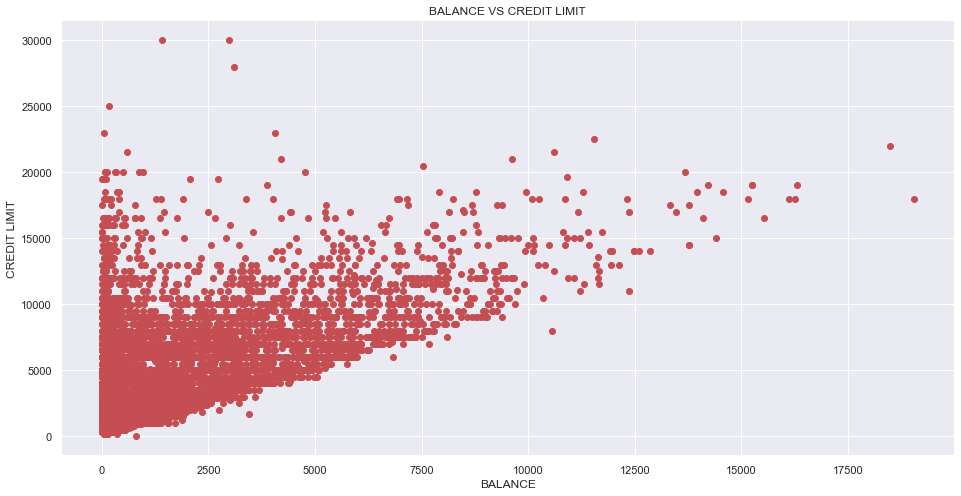

In [26]:
plt.figure(figsize=(16,8)) # Adding size to the graph- width by height
# Use `+` as marker; color set as `g` (green); size proportion to Y values
plt.scatter(x = df['BALANCE'], y = df.CREDIT_LIMIT, c='r') 
# set x/y labels
plt.xlabel('BALANCE')
plt.ylabel('CREDIT LIMIT')
# set title
plt.title('BALANCE VS CREDIT LIMIT')

Text(0.5, 1.0, 'BALANCE VS CREDIT LIMIT')

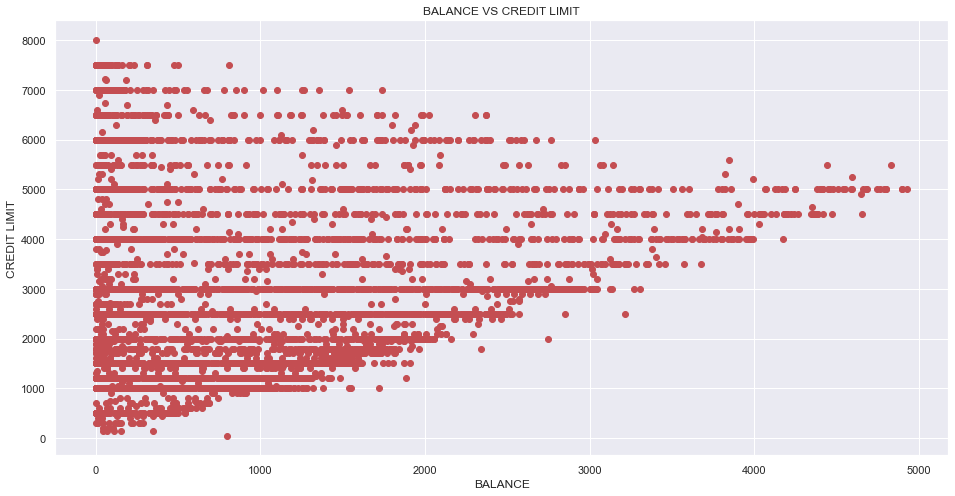

In [27]:
plt.figure(figsize=(16,8)) # Adding size to the graph- width by height
# Use `+` as marker; color set as `g` (green); size proportion to Y values
plt.scatter(x = cluster_one['BALANCE'], y = cluster_one.CREDIT_LIMIT, c='r') 
# set x/y labels
plt.xlabel('BALANCE')
plt.ylabel('CREDIT LIMIT')
# set title
plt.title('BALANCE VS CREDIT LIMIT')

In [28]:
cluster_two = df[df['label']==1]


Text(0.5, 1.0, 'BALANCE VS CREDIT LIMIT')

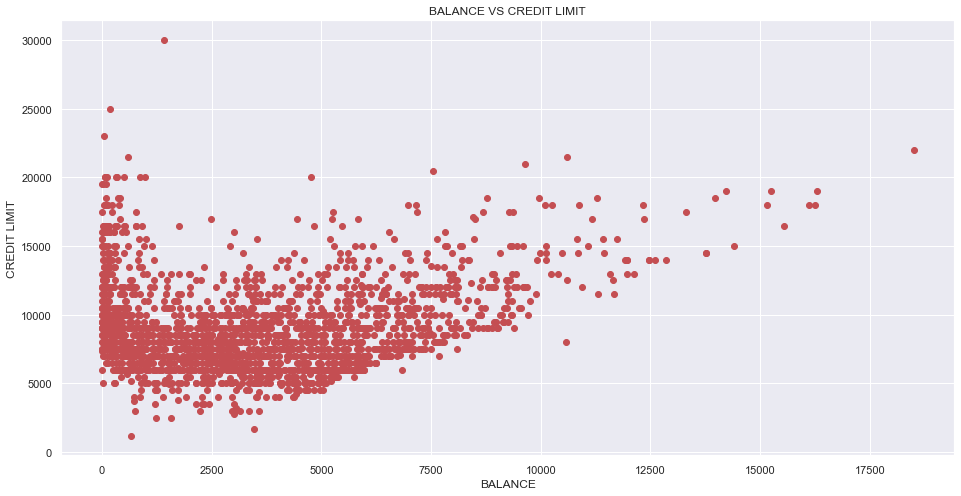

In [29]:
plt.figure(figsize=(16,8)) # Adding size to the graph- width by height
# Use `+` as marker; color set as `g` (green); size proportion to Y values
plt.scatter(x = cluster_two['BALANCE'], y = cluster_two.CREDIT_LIMIT, c='r') 
# set x/y labels
plt.xlabel('BALANCE')
plt.ylabel('CREDIT LIMIT')
# set title
plt.title('BALANCE VS CREDIT LIMIT')

In [30]:
cluster_three = df[df['label']==2]

Text(0.5, 1.0, 'BALANCE VS CREDIT LIMIT')

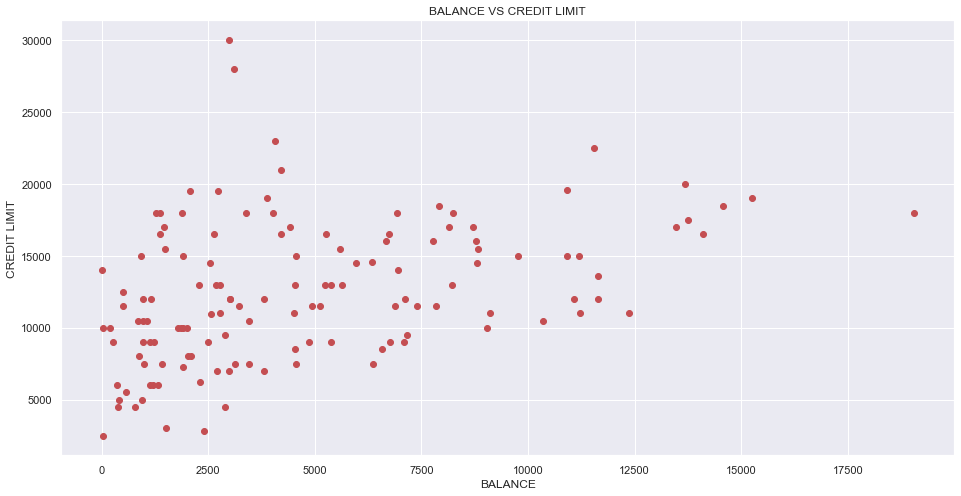

In [31]:
plt.figure(figsize=(16,8)) # Adding size to the graph- width by height
# Use `+` as marker; color set as `g` (green); size proportion to Y values
plt.scatter(x = cluster_three['BALANCE'], y = cluster_three.CREDIT_LIMIT, c='r') 
# set x/y labels
plt.xlabel('BALANCE')
plt.ylabel('CREDIT LIMIT')
# set title
plt.title('BALANCE VS CREDIT LIMIT')